# COGS 108 - Final Project

# Overview
In this project, we investigated the correlation between having more free throws attempted and winning more games by the use of bar charts, tables and pie charts to  visualize our data and T-test in order to analyze our data and check for correlations.

# Names
Zeshu Zhu <br>
David Zhao <br>
Kousha Changizi <br>
Brandon Chau <br>
Brian Wang <br>
Vala Masjedizadeh

# Group Members IDs
A13715102 <br>
A15752067 <br>
A15753159 <br>
A15719874 <br>
A13794255 <br>
A15692625 <br>

# Research Question
The question that we tackled and analyzed in this project is how much of an effect having more attempted free throws will have on winning games in the regular season.


# Background and Prior Work
In today’s modern NBA, James Harden is prolific for being a player that draws in more fouls than any other player in NBA history. Although James Harden is a super star athlete in his own right, many fans argue if his team wins only because of the amount of free throws he gets to shoot. Our question looks to dive into this by going into recent NBA seasons and analyzing each game though looking at the team that attempted more free throws and seeing if that team won or loss that game. Perhaps many people think that the more free throws mean the higher percentage the team winning rate, but the data we collect is not. 

From our research, we found previous work that showed free throws are important and crucial to team success in volume rather than accuracy (attempted over made).

References <br>
 1) http://theseason.gc.com/basketball-free-throw-rate

# Hypothesis
Our hypothesis for this question leads us to believe that more free throws attempted does lead to a higher % of won games because more free throw shots lead to more uncontested attempts which could naturally result in more points. Therefore we would have to expect the teams that make it to playoffs in Eastern and Western conference based on their regular season results and their seedings would have a correlation with their attempted free throws. In other words, since these teams had more wins, we would expect that they would have more attempted free throws than the league average and after finding meaningful values based on our analysis, we would look to see how much having more free throws impacted their winning rates.


# Setup

In [1]:
# Import needed libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import os
import scipy
from IPython.display import display_html
def display_side_by_side(*args):
   html_str=''
   for df in args:
       html_str+=df.to_html()
   display_html(html_str.replace('table','table style="display:inline"'),raw=True)
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

# Datasets
Our dataset was obtained from https://www.kaggle.com/pablote/nba-enhanced-stats. This dataset is based on box score and standings statistics of the NBA teams from 2012-2018. The data that we chose is official box scores which contains every statistic in an NBA game. The size of the whole dataset is 44.3k rows x 119 column.These data points that we used are the number of games that were played each regular season game results and each team’s rankings and free throws attempted in those games.


In [2]:
# Read in our file of data
df = pd.read_csv("2012-18_officialBoxScore.csv")
df.drop_duplicates( keep='first',inplace=True)

# Data Cleaning and Pre-Processing
The first step taken was extracting the data necessary from this dataset since it was a huge and detailed dataset and not all the data that was presented in this dataset interested us. We broke up the data just to have the games played in every regular season, their dates, game results and each team’s ranking and free throws attempted. 
 	
   Afterwards, we broke the data frame to look at the teams that had more free throws attempted in their games and observed the outcome of the game in which the respective team had more attempted free throws.
    
   Then, to go into more depth, we then extracted just the top 8 teams from each conference in the first and last season and compared their free throw attempts to the league average for that particular season. 


In [3]:
# Break up data frame to just the dates, team result, team free throws
DateRsltFta = df

wins = DateRsltFta[DateRsltFta['teamRslt'] == 'Win']
loss = DateRsltFta[DateRsltFta['teamRslt'] == 'Loss']

# Break up dataframes for each season
mask1213 = (DateRsltFta['gmDate'] >= '2012-10-30') & (DateRsltFta['gmDate'] <= '2013-04-17')
season1213 = DateRsltFta.loc[mask1213]

mask1314 = (DateRsltFta['gmDate'] >= '2013-10-29') & (DateRsltFta['gmDate'] <= '2014-04-16')
season1314 = DateRsltFta.loc[mask1314]

mask1415 = (DateRsltFta['gmDate'] >= '2014-10-28') & (DateRsltFta['gmDate'] <= '2015-04-15')
season1415 = DateRsltFta.loc[mask1415]

mask1516 = (DateRsltFta['gmDate'] >= '2015-10-27') & (DateRsltFta['gmDate'] <= '2016-04-13')
season1516 = DateRsltFta.loc[mask1516]

mask1617 = (DateRsltFta['gmDate'] >= '2016-10-25') & (DateRsltFta['gmDate'] <= '2017-04-12')
season1617 = DateRsltFta.loc[mask1617]

mask1718 = (DateRsltFta['gmDate'] >= '2017-10-17') & (DateRsltFta['gmDate'] <= '2018-04-11')
season1718 = DateRsltFta.loc[mask1718]



Summing total wins and losses per season:

In [4]:
# Break up data frame to see which team shot more free throws

# Season 2012-2013
moreFTA1213 = season1213[season1213['teamFTA'] > season1213['opptFTA']]
moreFTA1213.drop_duplicates( keep='first',inplace=True) 
sumMoreFTA1213Win = sum(moreFTA1213['teamRslt'] == 'Win')
sumMoreFTA1213Loss = sum(moreFTA1213['teamRslt'] == 'Loss')


moreFTA1213copy = moreFTA1213 
moreFTA1213copy.teamRslt[moreFTA1213copy.teamRslt == 'Win'] = 1
moreFTA1213copy.teamRslt[moreFTA1213copy.teamRslt == 'Loss'] = 0


# Season 2013-2014
moreFTA1314 = season1314[season1314['teamFTA'] > season1314['opptFTA']]
moreFTA1314.drop_duplicates( keep='first',inplace=True) 
sumMoreFTA1314Win = sum(moreFTA1314['teamRslt'] == 'Win')
sumMoreFTA1314Loss = sum(moreFTA1314['teamRslt'] == 'Loss')

# Season 2014-2015
moreFTA1415 = season1415[season1415['teamFTA'] > season1415['opptFTA']]
moreFTA1415.drop_duplicates( keep='first',inplace=True) 
sumMoreFTA1415Win = sum(moreFTA1415['teamRslt'] == 'Win')
sumMoreFTA1415Loss = sum(moreFTA1415['teamRslt'] == 'Loss')

# Season 2015-2016
moreFTA1516 = season1516[season1516['teamFTA'] > season1516['opptFTA']]
moreFTA1516.drop_duplicates( keep='first',inplace=True) 
sumMoreFTA1516Win = sum(moreFTA1516['teamRslt'] == 'Win')
sumMoreFTA1516Loss = sum(moreFTA1516['teamRslt'] == 'Loss')

# Season 2016-2017
moreFTA1617 = season1617[season1617['teamFTA'] > season1617['opptFTA']]
moreFTA1617.drop_duplicates( keep='first',inplace=True)
sumMoreFTA1617Win = sum(moreFTA1617['teamRslt'] == 'Win')
sumMoreFTA1617Loss = sum(moreFTA1617['teamRslt'] == 'Loss')

# Season 2017-2018
moreFTA1718 = season1718[season1718['teamFTA'] > season1718['opptFTA']]
moreFTA1718.drop_duplicates( keep='first',inplace=True) 
sumMoreFTA1718Win = sum(moreFTA1718['teamRslt'] == 'Win')
sumMoreFTA1718Loss = sum(moreFTA1718['teamRslt'] == 'Loss')


C:\Users\zhaoy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\zhaoy\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\zhaoy\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\zhaoy\Anaconda3\lib\site-packages\IPython\c

# Data Analysis and Results
Graphing Wins vs. Losses when shooting more free throws than the opposing team (All seasons combined)

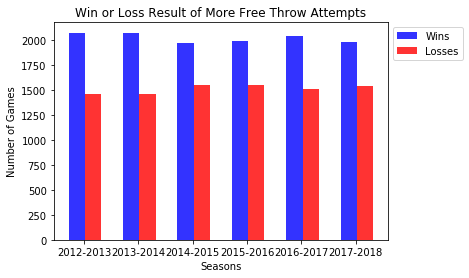

<Figure size 1080x1080 with 0 Axes>

In [5]:
seasons = ['2012-2013', '2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018']
wins = [sumMoreFTA1213Win, sumMoreFTA1314Win, sumMoreFTA1415Win, sumMoreFTA1516Win, sumMoreFTA1617Win, sumMoreFTA1718Win]
losses = [sumMoreFTA1213Loss, sumMoreFTA1314Loss, sumMoreFTA1415Loss, sumMoreFTA1516Loss, sumMoreFTA1617Loss, sumMoreFTA1718Loss]
# WinAndLossDf = pd.DataFrame(seasons,columns=['Seasons'])
# WinAndLossDf['Games Won'] = wins
# WinAndLossDf['Games Lost'] = losses
# WinAndLossDf.plot(x="Seasons", y=["Games Won", "Games Lost"],kind="bar", width=.4).legend(bbox_to_anchor=(1, 1))

# create plt
fig, ax = plt.subplots()
index = np.arange(6)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, wins, bar_width,
alpha=opacity,
color='b',
label='Wins')

rects2 = plt.bar(index + bar_width, losses, bar_width,
alpha=opacity,
color='r',
label='Losses')

plt.xlabel('Seasons')
plt.ylabel('Number of Games')
plt.title('Win or Loss Result of More Free Throw Attempts')
plt.xticks(index + bar_width-.17, seasons)
plt.legend()
plt.figure(figsize=(15,15))
# # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#            ncol=2, mode="expand", borderaxespad=0.)
ax.legend(loc='best', bbox_to_anchor=(1,1))
plt.tight_layout()

plt.show()

Plot 1: This is a bar plot indicating the outcome of the games for the team with more free throws attempted in each season from 2012-2018. For instance in the 2012-2013 season, approximately 2025 games were won where the winning team had more free throw attempts. From the plot we can tell that more games were won each season when more free throws were attempted and therefore there is a higher chance of winning a single game when more free throws are made.


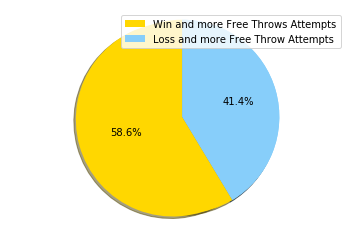

In [6]:
# For better visual, with a pie chart

labels = 'Win and more Free Throws Attempts', 'Loss and more Free Throw Attempts'
colors = ['gold', 'lightskyblue']
sizes = [sumMoreFTA1213Win, sumMoreFTA1213Loss]
explode = (0.1, 0)

patches,texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, explode=explode)
plt.legend(patches, labels, loc="best")
plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

Plot 2: In order to be able to better visualize the results, a pie chart is plotted in which the percentage of the games that were won and lost with more free throws attempted are shown. From the plot we can interpret that more free throws leads to a higher chance of winning a game since 58.6% of the games were won when more free shots were made.


In [7]:
# NBA Team Rankings 2012 - 2018

rank1 = pd.read_csv('12-13_Standing.csv')
rank1 = rank1.sort_values(by=['RANK'], ascending=True)

rank2 = pd.read_csv('13-14_Standing.csv')
rank2 = rank2.sort_values(by=['RANK'], ascending=True)

rank3 = pd.read_csv('14-15_Standing.csv')
rank3 = rank3.sort_values(by=['RANK'], ascending=True)

rank4 = pd.read_csv('15-16_Standing.csv')
rank4 = rank4.sort_values(by=['RANK'], ascending=True)

rank5 = pd.read_csv('16-17_Standing.csv')
rank5 = rank5.sort_values(by=['RANK'], ascending=True)

rank6 = pd.read_csv('17-18_Standing.csv')
rank6 = rank6.sort_values(by=['RANK'], ascending=True)

In [8]:
# Drop one of the duplicate column for each season

rank11 = rank1.drop(['RANKORD'], axis = 1)
rank22 = rank2.drop(['RANKORD'], axis = 1)
rank33 = rank3.drop(['RANKORD'], axis = 1)
rank44 = rank4.drop(['RANKORD'], axis = 1)
rank55 = rank5.drop(['RANKORD'], axis = 1)
rank66 = rank6.drop(['RANKORD'], axis = 1)

# Playoff Team ranking for reference (Each season)

In [9]:
# display data table 2012 - 13, 2013 - 14
display_side_by_side(rank11, rank22)

SEASON 
 TEAM 
 RANK 
 WIN 
 LOST 
 
 
 
 
 20 
 2012-13 
 OKC 
 1 
 60 
 22 
 
 
 15 
 2012-13 
 MIA 
 1 
 66 
 16 
 
 
 25 
 2012-13 
 SA 
 2 
 58 
 24 
 
 
 19 
 2012-13 
 NY 
 2 
 54 
 28 
 
 
 7 
 2012-13 
 DEN 
 3 
 57 
 25 
 
 
 11 
 2012-13 
 IND 
 3 
 49 
 32 
 
 
 14 
 2012-13 
 MEM 
 4 
 56 
 26 
 
 
 1 
 2012-13 
 BKN 
 4 
 49 
 33 
 
 
 12 
 2012-13 
 LAC 
 4 
 56 
 26 
 
 
 4 
 2012-13 
 CHI 
 5 
 45 
 37 
 
 
 0 
 2012-13 
 ATL 
 6 
 44 
 38 
 
 
 9 
 2012-13 
 GS 
 6 
 47 
 35 
 
 
 13 
 2012-13 
 LAL 
 7 
 45 
 37 
 
 
 2 
 2012-13 
 BOS 
 7 
 41 
 40 
 
 
 10 
 2012-13 
 HOU 
 7 
 45 
 37 
 
 
 16 
 2012-13 
 MIL 
 8 
 38 
 44 
 
 
 27 
 2012-13 
 TOR 
 9 
 34 
 48 
 
 
 28 
 2012-13 
 UTA 
 9 
 43 
 39 
 
 
 22 
 2012-13 
 PHI 
 9 
 34 
 48 
 
 
 6 
 2012-13 
 DAL 
 10 
 41 
 41 
 
 
 24 
 2012-13 
 POR 
 11 
 33 
 49 
 
 
 29 
 2012-13 
 WAS 
 11 
 29 
 53 
 
 
 8 
 2012-13 
 DET 
 11 
 29 
 53 
 
 
 17 
 2012-13 
 MIN 
 12 
 31 
 51 
 
 
 5 
 2012-13 
 CLE 
 13 
 24 
 58 
 
 
 26 
 2012-13 
 SAC 
 13 
 28 
 54 
 
 
 18 
 2012-13 
 NO 
 14 
 27 
 55 
 
 
 3 
 2012-13 
 CHA 
 14 
 21 
 61 
 
 
 23 
 2012-13 
 PHO 
 15 
 25 
 57 
 
 
 21 
 2012-13 
 ORL 
 15 
 20 
 62 
 
 
 
 
 
 
 SEASON 
 TEAM 
 RANK 
 WIN 
 LOST 
 
 
 
 
 24 
 2013-14 
 SA 
 1 
 62 
 20 
 
 
 10 
 2013-14 
 IND 
 1 
 56 
 26 
 
 
 14 
 2013-14 
 MIA 
 2 
 54 
 28 
 
 
 19 
 2013-14 
 OKC 
 2 
 59 
 23 
 
 
 26 
 2013-14 
 TOR 
 3 
 48 
 34 
 
 
 3 
 2013-14 
 CHI 
 3 
 48 
 34 
 
 
 11 
 2013-14 
 LAC 
 3 
 57 
 25 
 
 
 23 
 2013-14 
 POR 
 4 
 54 
 28 
 
 
 9 
 2013-14 
 HOU 
 4 
 54 
 28 
 
 
 0 
 2013-14 
 BKN 
 5 
 44 
 38 
 
 
 28 
 2013-14 
 WAS 
 5 
 44 
 38 
 
 
 8 
 2013-14 
 GS 
 6 
 51 
 31 
 
 
 2 
 2013-14 
 CHA 
 7 
 43 
 39 
 
 
 13 
 2013-14 
 MEM 
 7 
 50 
 32 
 
 
 5 
 2013-14 
 DAL 
 8 
 49 
 33 
 
 
 18 
 2013-14 
 NY 
 9 
 37 
 45 
 
 
 22 
 2013-14 
 PHO 
 9 
 48 
 34 
 
 
 16 
 2013-14 
 MIN 
 10 
 40 
 42 
 
 
 4 
 2013-14 
 CLE 
 10 
 33 
 49 
 
 
 6 
 2013-14 
 DEN 
 11 
 36 
 46 
 
 
 7 
 2013-14 
 DET 
 11 
 29 
 53 
 
 
 17 
 2013-14 
 NO 
 12 
 34 
 48 
 
 
 1 
 2013-14 
 BOS 
 12 
 25 
 57 
 
 
 20 
 2013-14 
 ORL 
 13 
 23 
 59 
 
 
 25 
 2013-14 
 SAC 
 13 
 28 
 54 
 
 
 12 
 2013-14 
 LAL 
 14 
 27 
 55 
 
 
 21 
 2013-14 
 PHI 
 14 
 19 
 63 
 
 
 15 
 2013-14 
 MIL 
 15 
 15 
 67 
 
 
 27 
 2013-14 
 UTA 
 15 
 25 
 57

In [10]:
# display data table 2014 - 15, 2015 - 16
display_side_by_side(rank33, rank44)

SEASON 
 TEAM 
 RANK 
 WIN 
 LOST 
 
 
 
 
 0 
 2014-15 
 ATL 
 1 
 60 
 22 
 
 
 9 
 2014-15 
 GS 
 1 
 67 
 15 
 
 
 12 
 2014-15 
 LAC 
 2 
 56 
 26 
 
 
 5 
 2014-15 
 CLE 
 2 
 53 
 29 
 
 
 10 
 2014-15 
 HOU 
 2 
 56 
 26 
 
 
 4 
 2014-15 
 CHI 
 3 
 50 
 32 
 
 
 27 
 2014-15 
 TOR 
 4 
 49 
 33 
 
 
 25 
 2014-15 
 SA 
 4 
 55 
 27 
 
 
 14 
 2014-15 
 MEM 
 4 
 55 
 27 
 
 
 29 
 2014-15 
 WAS 
 5 
 46 
 36 
 
 
 16 
 2014-15 
 MIL 
 6 
 41 
 41 
 
 
 24 
 2014-15 
 POR 
 6 
 51 
 31 
 
 
 6 
 2014-15 
 DAL 
 7 
 50 
 32 
 
 
 2 
 2014-15 
 BOS 
 7 
 40 
 42 
 
 
 11 
 2014-15 
 IND 
 8 
 38 
 44 
 
 
 1 
 2014-15 
 BKN 
 8 
 38 
 44 
 
 
 18 
 2014-15 
 NO 
 8 
 45 
 37 
 
 
 20 
 2014-15 
 OKC 
 8 
 45 
 37 
 
 
 15 
 2014-15 
 MIA 
 10 
 37 
 45 
 
 
 23 
 2014-15 
 PHO 
 10 
 39 
 43 
 
 
 3 
 2014-15 
 CHA 
 11 
 33 
 49 
 
 
 28 
 2014-15 
 UTA 
 11 
 38 
 44 
 
 
 7 
 2014-15 
 DEN 
 12 
 30 
 52 
 
 
 8 
 2014-15 
 DET 
 12 
 32 
 50 
 
 
 21 
 2014-15 
 ORL 
 13 
 25 
 57 
 
 
 26 
 2014-15 
 SAC 
 13 
 29 
 53 
 
 
 13 
 2014-15 
 LAL 
 14 
 21 
 61 
 
 
 22 
 2014-15 
 PHI 
 14 
 18 
 64 
 
 
 17 
 2014-15 
 MIN 
 15 
 16 
 66 
 
 
 19 
 2014-15 
 NY 
 15 
 17 
 65 
 
 
 
 
 
 
 SEASON 
 TEAM 
 RANK 
 WIN 
 LOST 
 
 
 
 
 5 
 2015-16 
 CLE 
 1 
 57 
 25 
 
 
 9 
 2015-16 
 GS 
 1 
 73 
 9 
 
 
 27 
 2015-16 
 TOR 
 2 
 56 
 26 
 
 
 25 
 2015-16 
 SA 
 2 
 67 
 15 
 
 
 0 
 2015-16 
 ATL 
 3 
 48 
 34 
 
 
 2 
 2015-16 
 BOS 
 3 
 48 
 34 
 
 
 3 
 2015-16 
 CHA 
 3 
 48 
 34 
 
 
 20 
 2015-16 
 OKC 
 3 
 55 
 27 
 
 
 15 
 2015-16 
 MIA 
 3 
 48 
 34 
 
 
 12 
 2015-16 
 LAC 
 4 
 53 
 29 
 
 
 24 
 2015-16 
 POR 
 5 
 44 
 38 
 
 
 14 
 2015-16 
 MEM 
 6 
 42 
 40 
 
 
 6 
 2015-16 
 DAL 
 6 
 42 
 40 
 
 
 11 
 2015-16 
 IND 
 7 
 45 
 37 
 
 
 10 
 2015-16 
 HOU 
 8 
 41 
 41 
 
 
 8 
 2015-16 
 DET 
 8 
 44 
 38 
 
 
 28 
 2015-16 
 UTA 
 9 
 40 
 42 
 
 
 4 
 2015-16 
 CHI 
 9 
 42 
 40 
 
 
 26 
 2015-16 
 SAC 
 10 
 33 
 49 
 
 
 7 
 2015-16 
 DEN 
 10 
 33 
 49 
 
 
 29 
 2015-16 
 WAS 
 10 
 41 
 41 
 
 
 21 
 2015-16 
 ORL 
 11 
 35 
 47 
 
 
 18 
 2015-16 
 NO 
 12 
 30 
 52 
 
 
 16 
 2015-16 
 MIL 
 12 
 33 
 49 
 
 
 17 
 2015-16 
 MIN 
 13 
 29 
 53 
 
 
 19 
 2015-16 
 NY 
 13 
 32 
 50 
 
 
 23 
 2015-16 
 PHO 
 14 
 23 
 59 
 
 
 1 
 2015-16 
 BKN 
 14 
 21 
 61 
 
 
 22 
 2015-16 
 PHI 
 15 
 10 
 72 
 
 
 13 
 2015-16 
 LAL 
 15 
 17 
 65

In [11]:
# display data table 2016 - 17, 2017 - 18
display_side_by_side(rank55, rank66)

SEASON 
 TEAM 
 RANK 
 WIN 
 LOST 
 
 
 
 
 2 
 2016-2017 
 BOS 
 1 
 53 
 29 
 
 
 9 
 2016-2017 
 GS 
 1 
 67 
 15 
 
 
 27 
 2016-2017 
 TOR 
 2 
 51 
 31 
 
 
 25 
 2016-2017 
 SA 
 2 
 61 
 21 
 
 
 5 
 2016-2017 
 CLE 
 2 
 51 
 31 
 
 
 10 
 2016-2017 
 HOU 
 3 
 55 
 27 
 
 
 29 
 2016-2017 
 WAS 
 4 
 49 
 33 
 
 
 28 
 2016-2017 
 UTA 
 4 
 51 
 31 
 
 
 12 
 2016-2017 
 LAC 
 4 
 51 
 31 
 
 
 0 
 2016-2017 
 ATL 
 5 
 43 
 39 
 
 
 11 
 2016-2017 
 IND 
 6 
 42 
 40 
 
 
 20 
 2016-2017 
 OKC 
 6 
 47 
 35 
 
 
 16 
 2016-2017 
 MIL 
 6 
 42 
 40 
 
 
 14 
 2016-2017 
 MEM 
 7 
 43 
 39 
 
 
 24 
 2016-2017 
 POR 
 8 
 41 
 41 
 
 
 4 
 2016-2017 
 CHI 
 8 
 41 
 41 
 
 
 15 
 2016-2017 
 MIA 
 8 
 41 
 41 
 
 
 7 
 2016-2017 
 DEN 
 9 
 40 
 42 
 
 
 18 
 2016-2017 
 NO 
 10 
 34 
 48 
 
 
 8 
 2016-2017 
 DET 
 10 
 37 
 45 
 
 
 6 
 2016-2017 
 DAL 
 11 
 33 
 49 
 
 
 3 
 2016-2017 
 CHA 
 11 
 36 
 46 
 
 
 26 
 2016-2017 
 SAC 
 12 
 32 
 50 
 
 
 19 
 2016-2017 
 NY 
 12 
 31 
 51 
 
 
 21 
 2016-2017 
 ORL 
 13 
 29 
 53 
 
 
 17 
 2016-2017 
 MIN 
 13 
 31 
 51 
 
 
 13 
 2016-2017 
 LAL 
 14 
 26 
 56 
 
 
 22 
 2016-2017 
 PHI 
 14 
 28 
 54 
 
 
 23 
 2016-2017 
 PHO 
 15 
 24 
 58 
 
 
 1 
 2016-2017 
 BKN 
 15 
 20 
 62 
 
 
 
 
 
 
 SEASON 
 TEAM 
 RANK 
 WIN 
 LOST 
 
 
 
 
 27 
 2017-18 
 TOR 
 1 
 59 
 23 
 
 
 10 
 2017-18 
 HOU 
 1 
 65 
 17 
 
 
 2 
 2017-18 
 BOS 
 2 
 55 
 27 
 
 
 9 
 2017-18 
 GS 
 2 
 58 
 24 
 
 
 22 
 2017-18 
 PHI 
 3 
 52 
 30 
 
 
 24 
 2017-18 
 POR 
 3 
 49 
 33 
 
 
 20 
 2017-18 
 OKC 
 4 
 48 
 34 
 
 
 5 
 2017-18 
 CLE 
 4 
 50 
 32 
 
 
 18 
 2017-18 
 NO 
 4 
 48 
 34 
 
 
 28 
 2017-18 
 UTA 
 4 
 48 
 34 
 
 
 11 
 2017-18 
 IND 
 5 
 48 
 34 
 
 
 16 
 2017-18 
 MIL 
 6 
 44 
 38 
 
 
 15 
 2017-18 
 MIA 
 6 
 44 
 38 
 
 
 25 
 2017-18 
 SA 
 7 
 47 
 35 
 
 
 17 
 2017-18 
 MIN 
 7 
 47 
 35 
 
 
 29 
 2017-18 
 WAS 
 8 
 43 
 39 
 
 
 8 
 2017-18 
 DET 
 9 
 39 
 43 
 
 
 7 
 2017-18 
 DEN 
 9 
 46 
 36 
 
 
 3 
 2017-18 
 CHA 
 10 
 36 
 46 
 
 
 12 
 2017-18 
 LAC 
 10 
 42 
 40 
 
 
 19 
 2017-18 
 NY 
 11 
 29 
 53 
 
 
 13 
 2017-18 
 LAL 
 11 
 35 
 47 
 
 
 1 
 2017-18 
 BKN 
 12 
 28 
 54 
 
 
 26 
 2017-18 
 SAC 
 12 
 27 
 55 
 
 
 6 
 2017-18 
 DAL 
 13 
 24 
 58 
 
 
 4 
 2017-18 
 CHI 
 13 
 27 
 55 
 
 
 14 
 2017-18 
 MEM 
 14 
 22 
 60 
 
 
 21 
 2017-18 
 ORL 
 14 
 25 
 57 
 
 
 23 
 2017-18 
 PHO 
 15 
 21 
 61 
 
 
 0 
 2017-18 
 ATL 
 15 
 24 
 58

Calculating each season's league average free throws per game:

In [12]:
#League average free throw attempts

leagueAVG1213 = season1213['teamFTA'].sum() / len(season1213)

leagueAVG1314 = season1314['teamFTA'].sum() / len(season1314)

leagueAVG1415 = season1415['teamFTA'].sum() / len(season1415)

leagueAVG1516 = season1516['teamFTA'].sum() / len(season1516)

leagueAVG1617 = season1617['teamFTA'].sum() / len(season1617)

leagueAVG1718 = season1718['teamFTA'].sum() / len(season1718)


Calculating Average Free Throw Attempts for teams that made the playoffs (For simplication, we will only look at the Season 2012-2013 and 2017-2018):

In [13]:
#Season 12-13 teams making playoffs

# Eastern Conference

# Seed 1
MIA1213 = season1213[season1213['teamAbbr'] == 'MIA']
MIAFTA1213 = MIA1213['teamFTA'].sum() / len(MIA1213)
MIA1213DIFF = MIAFTA1213 - leagueAVG1213;

# Seed 2
NY1213 = season1213[season1213['teamAbbr'] == 'NY']
NYFTA1213 = NY1213['teamFTA'].sum() / len(NY1213)
NY1213DIFF = NYFTA1213 - leagueAVG1213;



# Seed 3
IND1213 = season1213[season1213['teamAbbr'] == 'IND']
INDFTA1213 = IND1213['teamFTA'].sum() / len(IND1213)
IND1213DIFF = INDFTA1213 - leagueAVG1213;

# Seed 4
BKN1213 = season1213[season1213['teamAbbr'] == 'BKN']
BKNFTA1213 = BKN1213['teamFTA'].sum() / len(BKN1213)
BKN1213DIFF = BKNFTA1213 - leagueAVG1213;

# Seed 5
CHI1213 = season1213[season1213['teamAbbr'] == 'CHI']
CHIFTA1213 = CHI1213['teamFTA'].sum() / len(CHI1213)
CHI1213DIFF = CHIFTA1213 - leagueAVG1213;

# Seed 6
ATL1213 = season1213[season1213['teamAbbr'] == 'ATL']
ATLFTA1213 = ATL1213['teamFTA'].sum() / len(ATL1213)
ATL1213DIFF = ATLFTA1213 - leagueAVG1213;

# Seed 7
BOS1213 = season1213[season1213['teamAbbr'] == 'BOS']
BOSFTA1213 = BOS1213['teamFTA'].sum() / len(BOS1213)
BOS1213DIFF = BOSFTA1213 - leagueAVG1213;

# Seed 8
MIL1213 = season1213[season1213['teamAbbr'] == 'MIL']
MILFTA1213 = MIL1213['teamFTA'].sum() / len(MIL1213)
MIL1213DIFF = MILFTA1213 - leagueAVG1213;

East1213Top8 = [MIAFTA1213, NYFTA1213, INDFTA1213, BKNFTA1213, CHIFTA1213, ATLFTA1213, BOSFTA1213, MILFTA1213]
East1213Top8DIFF = [MIA1213DIFF, NY1213DIFF, IND1213DIFF, BKN1213DIFF, CHI1213DIFF, ATL1213DIFF, BOS1213DIFF, MIL1213DIFF]


# Western Conference

# Seed 1
OKC1213 = season1213[season1213['teamAbbr'] == 'OKC']
OKCFTA1213 = OKC1213['teamFTA'].sum() / len(OKC1213)
OKC1213DIFF = OKCFTA1213 - leagueAVG1213;

# Seed 2
SA1213 = season1213[season1213['teamAbbr'] == 'SA']
SAFTA1213 = SA1213['teamFTA'].sum() / len(SA1213)
SA1213DIFF = SAFTA1213 - leagueAVG1213;

# Seed 3
DEN1213 = season1213[season1213['teamAbbr'] == 'DEN']
DENFTA1213 = DEN1213['teamFTA'].sum() / len(DEN1213)
DEN1213DIFF = DENFTA1213 - leagueAVG1213;

# Seed 4
LAC1213 = season1213[season1213['teamAbbr'] == 'LAC']
LACFTA1213 = LAC1213['teamFTA'].sum() / len(LAC1213)
LAC1213DIFF = LACFTA1213 - leagueAVG1213;

# Seed 5
MEM1213 = season1213[season1213['teamAbbr'] == 'MEM']
MEMFTA1213 = MEM1213['teamFTA'].sum() / len(MEM1213)
MEM1213DIFF = MEMFTA1213 - leagueAVG1213;

# Seed 6
GS1213 = season1213[season1213['teamAbbr'] == 'GS']
GSFTA1213 = GS1213['teamFTA'].sum() / len(GS1213)
GS1213DIFF = GSFTA1213 - leagueAVG1213;

# Seed 7
LAL1213 = season1213[season1213['teamAbbr'] == 'LAL']
LALFTA1213 = LAL1213['teamFTA'].sum() / len(LAL1213)
LAL1213DIFF = LALFTA1213 - leagueAVG1213;

# Seed 8
HOU1213 = season1213[season1213['teamAbbr'] == 'HOU']
HOUFTA1213 = HOU1213['teamFTA'].sum() / len(HOU1213)
HOU1213DIFF = HOUFTA1213 - leagueAVG1213;

West1213Top8 = [OKCFTA1213, SAFTA1213, DENFTA1213, LACFTA1213, MEMFTA1213, GSFTA1213, LALFTA1213, HOUFTA1213]
West1213Top8DIFF = [OKC1213DIFF, SA1213DIFF, DEN1213DIFF, LAC1213DIFF, MEM1213DIFF, GS1213DIFF, LAL1213DIFF, HOU1213DIFF]

leagueAVG1213Index = [leagueAVG1213, leagueAVG1213, leagueAVG1213, leagueAVG1213, leagueAVG1213, leagueAVG1213, leagueAVG1213, leagueAVG1213]

In [14]:
#Season 17-18 teams making playoffs

# Eastern Conference

# Seed 1
TOR1718 = season1718[season1718['teamAbbr'] == 'TOR']
TORFTA1718 = TOR1718['teamFTA'].sum() / len(TOR1718)
TOR1718DIFF = TORFTA1718 - leagueAVG1718;

# Seed 2
BOS1718 = season1718[season1718['teamAbbr'] == 'BOS']
BOSFTA1718 = BOS1718['teamFTA'].sum() / len(BOS1718)
BOS1718DIFF = BOSFTA1718 - leagueAVG1718;


# Seed 3
PHI1718 = season1718[season1718['teamAbbr'] == 'PHI']
PHIFTA1718 = PHI1718['teamFTA'].sum() / len(PHI1718)
PHI1718DIFF = PHIFTA1718 - leagueAVG1718;

# Seed 4
CLE1718 = season1718[season1718['teamAbbr'] == 'CLE']
CLEFTA1718 = CLE1718['teamFTA'].sum() / len(CLE1718)
CLE1718DIFF = CLEFTA1718 - leagueAVG1718;

# Seed 5
IND1718 = season1718[season1718['teamAbbr'] == 'IND']
INDFTA1718 = IND1213['teamFTA'].sum() / len(IND1718)
IND1718DIFF = INDFTA1718 - leagueAVG1718;

# Seed 6
MIA1718 = season1718[season1718['teamAbbr'] == 'MIA']
MIAFTA1718 = MIA1213['teamFTA'].sum() / len(MIA1718)
MIA1718DIFF = MIAFTA1718 - leagueAVG1718;

# Seed 7
MIL1718 = season1718[season1718['teamAbbr'] == 'MIL']
MILFTA1718 = MIL1213['teamFTA'].sum() / len(MIL1718)
MIL1718DIFF = MILFTA1718 - leagueAVG1718;

# Seed 8
WAS1718 = season1718[season1718['teamAbbr'] == 'WAS']
WASFTA1718 = WAS1718['teamFTA'].sum() / len(WAS1718)
WAS1718DIFF = WASFTA1718 - leagueAVG1718;

East1718Top8 = [TORFTA1718, BOSFTA1718, PHIFTA1718, CLEFTA1718, INDFTA1718, MIAFTA1718, MILFTA1718, WASFTA1718]
East1718Top8DIFF = [TOR1718DIFF, BOS1718DIFF, PHI1718DIFF, CLE1718DIFF, IND1718DIFF, MIA1718DIFF, MIL1718DIFF, WAS1718DIFF]

# Western Conference

# Seed 1
HOU1718 = season1718[season1718['teamAbbr'] == 'HOU']
HOUFTA1718 = HOU1718['teamFTA'].sum() / len(HOU1718)
HOU1718DIFF = HOUFTA1718 - leagueAVG1718;

# Seed 2
GS1718 = season1718[season1718['teamAbbr'] == 'GS']
GSFTA1718 = GS1718['teamFTA'].sum() / len(GS1718)
GS1718DIFF = GSFTA1718 - leagueAVG1718;

# Seed 3
POR1718 = season1718[season1718['teamAbbr'] == 'POR']
PORFTA1718 = POR1718['teamFTA'].sum() / len(POR1718)
POR1718DIFF = PORFTA1718 - leagueAVG1718;

# Seed 4
OKC1718 = season1718[season1718['teamAbbr'] == 'OKC']
OKCFTA1718 = OKC1718['teamFTA'].sum() / len(OKC1718)
OKC1718DIFF = OKCFTA1718 - leagueAVG1718;

# Seed 5
UTA1718 = season1718[season1718['teamAbbr'] == 'UTA']
UTAFTA1718 = UTA1718['teamFTA'].sum() / len(UTA1718)
UTA1718DIFF = UTAFTA1718 - leagueAVG1718;

# Seed 6
NO1718 = season1718[season1718['teamAbbr'] == 'NO']
NOFTA1718 = NO1718['teamFTA'].sum() / len(NO1718)
NO1718DIFF = NOFTA1718 - leagueAVG1718;

# Seed 7
SA1718 = season1718[season1718['teamAbbr'] == 'SA']
SAFTA1718 = SA1718['teamFTA'].sum() / len(SA1718)
SA1718DIFF = SAFTA1718 - leagueAVG1718;

# Seed 8
MIN1718 = season1718[season1718['teamAbbr'] == 'MIN']
MINFTA1718 = MIN1718['teamFTA'].sum() / len(MIN1718)
MIN1718DIFF = MINFTA1718 - leagueAVG1718;

West1718Top8 = [HOUFTA1718, GSFTA1718, PORFTA1718, OKCFTA1718, UTAFTA1718, NOFTA1718, SAFTA1718, MINFTA1718]
West1718Top8DIFF = [HOU1718DIFF, GS1718DIFF, POR1718DIFF, OKC1718DIFF, UTA1718DIFF, NO1718DIFF, SA1718DIFF, MIN1718DIFF]

leagueAVG1718Index = [leagueAVG1718, leagueAVG1718, leagueAVG1718, leagueAVG1718, leagueAVG1718, leagueAVG1718, leagueAVG1718, leagueAVG1718]

Checking for correlation in free throws per game between teams making the playoffs and the league average of 2012-2013 and 2017-2018 season (Comparing averages and the differences):

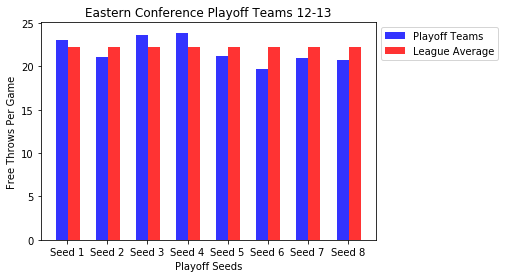

<Figure size 1080x1080 with 0 Axes>

In [15]:
playOffSeed = ['Seed 1', 'Seed 2', 'Seed 3', 'Seed 4', 'Seed 5', 'Seed 6', 'Seed 7', 'Seed 8']

# create plt
fig, ax = plt.subplots()
index = np.arange(8)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, East1213Top8 , bar_width,
alpha=opacity,
color='b',
label='Playoff Teams')

rects2 = plt.bar(index + bar_width, leagueAVG1213Index, bar_width,
alpha=opacity,
color='r',
label='League Average')

plt.xlabel('Playoff Seeds')
plt.ylabel('Free Throws Per Game')
plt.title('Eastern Conference Playoff Teams 12-13')
plt.xticks(index + bar_width-.17, playOffSeed)
plt.legend()
plt.figure(figsize=(15,15))
ax.legend(loc='best', bbox_to_anchor=(1,1))
plt.tight_layout()

plt.show()

Plot 3 above:

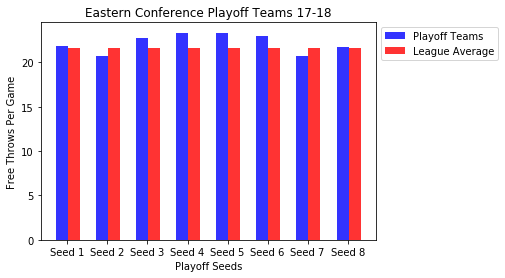

<Figure size 1080x1080 with 0 Axes>

In [16]:
playOffSeed = ['Seed 1', 'Seed 2', 'Seed 3', 'Seed 4', 'Seed 5', 'Seed 6', 'Seed 7', 'Seed 8']

# create plt
fig, ax = plt.subplots()
index = np.arange(8)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, East1718Top8 , bar_width,
alpha=opacity,
color='b',
label='Playoff Teams')

rects2 = plt.bar(index + bar_width, leagueAVG1718Index, bar_width,
alpha=opacity,
color='r',
label='League Average')

plt.xlabel('Playoff Seeds')
plt.ylabel('Free Throws Per Game')
plt.title('Eastern Conference Playoff Teams 17-18')
plt.xticks(index + bar_width-.17, playOffSeed)
plt.legend()
plt.figure(figsize=(15,15))
ax.legend(loc='best', bbox_to_anchor=(1,1))
plt.tight_layout()

plt.show()

Plot 3 & 4: These two bar graphs show the average of free throws made by each team that made it to Eastern Conference playoffs compared to the regular season average of free throws made in 2012-2013 in plot 3 and 2017-2018 in plot 4. From the plot we can see that not all the teams that made it to playoffs had above average free throws made even though these teams are the 8 teams with the highest rate of wins in that season. 


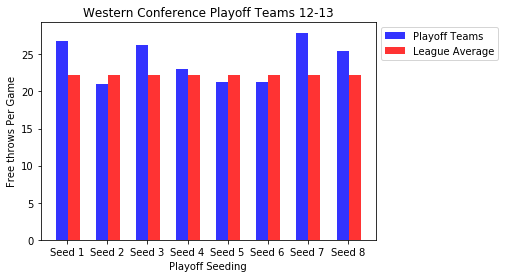

<Figure size 1080x1080 with 0 Axes>

In [17]:
fig, ax = plt.subplots()
index = np.arange(8)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, West1213Top8 , bar_width,
alpha=opacity,
color='b',
label='Playoff Teams')

rects2 = plt.bar(index + bar_width, leagueAVG1213Index, bar_width,
alpha=opacity,
color='r',
label='League Average')

plt.xlabel('Playoff Seeding')
plt.ylabel('Free throws Per Game')
plt.title('Western Conference Playoff Teams 12-13')
plt.xticks(index + bar_width-.17, playOffSeed)
plt.legend()
plt.figure(figsize=(15,15))
ax.legend(loc='best', bbox_to_anchor=(1,1))
plt.tight_layout()

plt.show()

Plot 5 above:

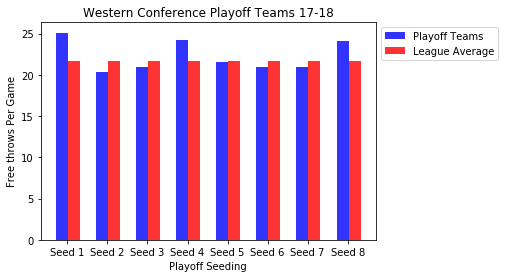

<Figure size 1080x1080 with 0 Axes>

In [18]:
fig, ax = plt.subplots()
index = np.arange(8)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, West1718Top8 , bar_width,
alpha=opacity,
color='b',
label='Playoff Teams')

rects2 = plt.bar(index + bar_width, leagueAVG1718Index, bar_width,
alpha=opacity,
color='r',
label='League Average')

plt.xlabel('Playoff Seeding')
plt.ylabel('Free throws Per Game')
plt.title('Western Conference Playoff Teams 17-18')
plt.xticks(index + bar_width-.17, playOffSeed)
plt.legend()
plt.figure(figsize=(15,15))
ax.legend(loc='best', bbox_to_anchor=(1,1))
plt.tight_layout()

plt.show()

Plot 5 & 6: These two bar graphs show the average of free throws made by each team that made it to Western Conference playoffs compared to the regular season average of free throws made in 2012-2013 in plot 3 and 2017-2018 in plot 4. From the plot we can see that not all the teams that made it to playoffs had above average free throws made even though these teams are the 8 teams with the highest rate of wins in that season. 


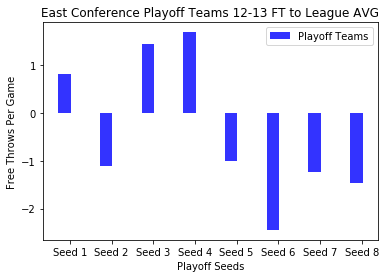

<Figure size 1080x1080 with 0 Axes>

In [19]:
playOffSeed = ['Seed 1', 'Seed 2', 'Seed 3', 'Seed 4', 'Seed 5', 'Seed 6', 'Seed 7', 'Seed 8']

# create plt
fig, ax = plt.subplots()
index = np.arange(8)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, East1213Top8DIFF , bar_width,
alpha=opacity,
color='b',
label='Playoff Teams')

#rects2 = plt.bar(index + bar_width, leagueAVGIndex, bar_width,
# alpha=opacity,
# color='r',
# label='League Average')

plt.xlabel('Playoff Seeds')
plt.ylabel('Free Throws Per Game')
plt.title('East Conference Playoff Teams 12-13 FT to League AVG')
plt.xticks(index + bar_width-.17, playOffSeed)
plt.legend()
plt.figure(figsize=(15,15))
ax.legend(loc='best', bbox_to_anchor=(1,1))
plt.tight_layout()

plt.show()

Plot 7 above:

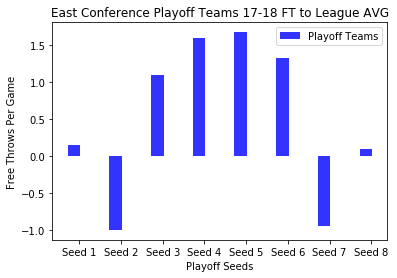

<Figure size 1080x1080 with 0 Axes>

In [20]:
playOffSeed = ['Seed 1', 'Seed 2', 'Seed 3', 'Seed 4', 'Seed 5', 'Seed 6', 'Seed 7', 'Seed 8']

# create plt
fig, ax = plt.subplots()
index = np.arange(8)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, East1718Top8DIFF , bar_width,
alpha=opacity,
color='b',
label='Playoff Teams')

#rects2 = plt.bar(index + bar_width, leagueAVGIndex, bar_width,
# alpha=opacity,
# color='r',
# label='League Average')

plt.xlabel('Playoff Seeds')
plt.ylabel('Free Throws Per Game')
plt.title('East Conference Playoff Teams 17-18 FT to League AVG')
plt.xticks(index + bar_width-.17, playOffSeed)
plt.legend()
plt.figure(figsize=(15,15))
ax.legend(loc='best', bbox_to_anchor=(1,1))
plt.tight_layout()

plt.show()

Plot 7 & 8: These two bar graphs represent the same concept as plot 3 & 4. However, in order to be able to better visualize the results, the average of free throws made by each playoff team was subtracted by the league average hence explaining the negative values. The negative values indicates the Eastern Conference teams that made it to playoffs but were below average when it comes to free throws attempted.


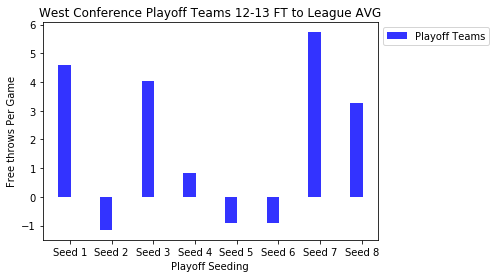

<Figure size 1080x1080 with 0 Axes>

In [21]:
fig, ax = plt.subplots()
index = np.arange(8)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, West1213Top8DIFF , bar_width,
alpha=opacity,
color='b',
label='Playoff Teams')

# rects2 = plt.bar(index + bar_width, leagueAVGIndex, bar_width,
# alpha=opacity,
# color='r',
# label='League Average')

plt.xlabel('Playoff Seeding')
plt.ylabel('Free throws Per Game')
plt.title('West Conference Playoff Teams 12-13 FT to League AVG')
plt.xticks(index + bar_width-.17, playOffSeed)
plt.legend()
plt.figure(figsize=(15,15))
ax.legend(loc='best', bbox_to_anchor=(1,1))
plt.tight_layout()

plt.show()

Plot 9 above:

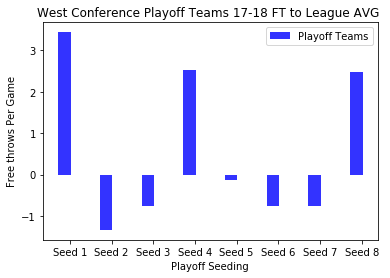

<Figure size 1080x1080 with 0 Axes>

In [22]:
fig, ax = plt.subplots()
index = np.arange(8)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, West1718Top8DIFF , bar_width,
alpha=opacity,
color='b',
label='Playoff Teams')

# rects2 = plt.bar(index + bar_width, leagueAVGIndex, bar_width,
# alpha=opacity,
# color='r',
# label='League Average')

plt.xlabel('Playoff Seeding')
plt.ylabel('Free throws Per Game')
plt.title('West Conference Playoff Teams 17-18 FT to League AVG ')
plt.xticks(index + bar_width-.17, playOffSeed)
plt.legend()
plt.figure(figsize=(15,15))
ax.legend(loc='best', bbox_to_anchor=(1,1))
plt.tight_layout()

plt.show()

Plot 9 & 10: These two bar graphs represent the same concept as plot 5 & 6. However, in order to be able to better visualize the results, the average of free throws made by each playoff team was subtracted by the league average hence explaining the negative values. The negative values indicates the Western Conference teams that made it to playoffs but were below average when it comes to free throws attempted.


In [23]:
# 2012-2013 T-Test Data

East1213Stats = scipy.stats.ttest_1samp(East1213Top8, leagueAVG1213)
West1213Stats = scipy.stats.ttest_1samp(West1213Top8, leagueAVG1213)

dataEast1213 = [[East1213Stats[0], East1213Stats[1]/2]]
East1213_statTable = pd.DataFrame(dataEast1213, columns=['Test Statistic', 'p-value'])

dataWest1213 = [[West1213Stats[0], West1213Stats[1]/2]]
West1213_statTable = pd.DataFrame(dataWest1213, columns=['Test Statistic', 'p-value'])

In [24]:
# 2017-2018 T-Test Data

East1718Stats = scipy.stats.ttest_1samp(East1718Top8, leagueAVG1718)
West1718Stats = scipy.stats.ttest_1samp(West1718Top8, leagueAVG1718)

dataEast1718 = [[East1718Stats[0], East1718Stats[1]/2]]
East1718_statTable = pd.DataFrame(dataEast1718, columns=['Test Statistic', 'p-value'])

dataWest1718 = [[West1718Stats[0], West1718Stats[1]/2]]
West1718_statTable = pd.DataFrame(dataWest1718, columns=['Test Statistic', 'p-value'])

East Playoff Teams 12-13 T-Test Results:


In [25]:
East1213_statTable

Test Statistic   p-value
0       -0.759076  0.236294

East Playoff Teams 17-18 T-Test Results:

In [26]:
East1718_statTable

Test Statistic   p-value
0        1.314815  0.115004

West Playoff Teams 12-13 T-Test Results:

In [27]:
West1213_statTable

Test Statistic   p-value
0        1.961229  0.045328

West Playoff Teams 17-18 T-Test Results:

In [28]:
West1718_statTable

Test Statistic   p-value
0        0.876004  0.205039

T-test Explanation: We decided to go more in depth about whether there was a correlation between the league average free throw attempts and the average free throw attempts for making the playoffs(top 8) in the Eastern and Western Conferences for the first season of our data set(2012-2013) and the last season of our data set(2017-2018). We carried this out by running a one-sample T-Test on the league average free throw attempts per game and either the top 8 teams of the Western Conference or Eastern Conference in a respective season. After getting the p-value from doing the T-Test, we compare it to our alpha value of 0.05. We discovered that for the top 8 Eastern conference teams from the 2012-2013 and 2017-2018 season and the Western Conference playoff teams from the 2017-2018 season, there was no correlation between free throw attempts and making the playoffs as the p-values were all way above .05 (i.e .236, .115, .205). However, the test for the top 8 Western Conference teams of the 2012-2013 season was below .05 (0.04) but we see this as a coincidence.


# Ethics and Privacy

In this project we were not violating any ethical codes because we are only analyzing basketball data that has been made public by the NBA. The dataset that was chosen is official box score statistics which is simply every piece of statistical data from an NBA game with no bias as it just records all pieces of data from the game. One unintended consequence that our findings could have is that the NBA teams could use this analysis in order to strategize when it comes to committing fouls and giving away free throws since we have proven that more free throw attempts does not correlate with more wins. “Intentionally fouling” strategy already exists where teams that are behind intentionally commit fouls by the end of the game as soon as the other team gains possession in the hopes that the opposition would miss their free throws and therefore we believe that taking steps to guard our findings is redundant. 

# Conclusion & Discussion
Our results indicate that there is a higher chance of winning a single game with more number of free throws attempted but there is no correlation between having more free throws leading into a higher win percentage during the regular season. It was shown that our hypothesis was partly inaccurate since we expected that playoff teams who have the most wins during the regular season to have more average free throws attempted compared to the league average since more free throws in a game results in a higher chance of winning that game but it was proven otherwise. In the seasons that we analyzed there were quite a few seeds that were below the league average of free throws in both conferences. 
Some limitations of our analysis was that we only went truly in depth on the first and last seasons of our data set to see the correlation between winning enough games to make the playoffs and the amount of free throw attempts per game. 
